In [22]:
import pandas as pd
import pyarrow.parquet as pq
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
pd.options.display.float_format = "{:,.3f}".format

# Loading NYC Taxi Data

We'll load a Yellow Taxi dataset from January 2025 using pandas with pyarrow engine for efficient parquet reading.

In [24]:
# Set up the file path
data_dir = Path("../data")
file_path = data_dir / "yellow_tripdata_2025-01.parquet"

# Read the parquet file
try:
    df = pd.read_parquet(file_path)
    
    # Display basic information about the dataset
    print("Dataset Info:")
    print("-" * 40)
    print(f"Number of records: {len(df):,}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"\nColumns: {', '.join(df.columns)}")
    print("\nFirst few rows:")
    display(df.head())
    
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error loading the file: {str(e)}")

Dataset Info:
----------------------------------------
Number of records: 3,475,226
Memory usage: 490.51 MB

Columns: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, cbd_congestion_fee

First few rows:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.000,1.600,1.000,N,229,237,1,10.000,3.500,0.500,3.000,0.000,1.000,18.000,2.500,0.000,0.000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.000,0.500,1.000,N,236,237,1,5.100,3.500,0.500,2.020,0.000,1.000,12.120,2.500,0.000,0.000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.000,0.600,1.000,N,141,141,1,5.100,3.500,0.500,2.000,0.000,1.000,12.100,2.500,0.000,0.000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.000,0.520,1.000,N,244,244,2,7.200,1.000,0.500,0.000,0.000,1.000,9.700,0.000,0.000,0.000
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.000,0.660,1.000,N,244,116,2,5.800,1.000,0.500,0.000,0.000,1.000,8.300,0.000,0.000,0.000


# Exploratory Data Analysis

Let's analyze each field in our dataset systematically:
1. Data types and missing values
2. Basic statistics
3. Value distributions
4. Temporal patterns
5. Correlations between numerical fields

In [20]:
# 1. Data Types and Missing Values Analysis
print("Data Types and Memory Usage:")
dtypes_info = df.dtypes.to_frame('dtype')
dtypes_info['memory_mb'] = df.memory_usage(deep=True) / 1024**2
dtypes_info['missing_pct'] = (df.isnull().sum() / len(df)) * 100
print(dtypes_info)

Data Types and Memory Usage:
                                dtype  memory_mb  missing_pct
VendorID                        int32     13.257        0.000
tpep_pickup_datetime   datetime64[us]     26.514        0.000
tpep_dropoff_datetime  datetime64[us]     26.514        0.000
passenger_count               float64     26.514       15.543
trip_distance                 float64     26.514        0.000
RatecodeID                    float64     26.514       15.543
store_and_fwd_flag             object    174.711       15.543
PULocationID                    int32     13.257        0.000
DOLocationID                    int32     13.257        0.000
payment_type                    int64     26.514        0.000
fare_amount                   float64     26.514        0.000
extra                         float64     26.514        0.000
mta_tax                       float64     26.514        0.000
tip_amount                    float64     26.514        0.000
tolls_amount                  float64    

In [21]:
# 2. Basic Statistics for Numerical Fields
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate basic statistics
print("Numerical Fields Statistics:")
stats_df = df[numerical_cols].describe()
display(stats_df)


Numerical Fields Statistics:


,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,"2,935,077.000","3,475,226.000","2,935,077.000","3,475,226.000","3,475,226.000","3,475,226.000","3,475,226.000","3,475,226.000","3,475,226.000","3,475,226.000","3,475,226.000","2,935,077.000","2,935,077.000","3,475,226.000"
mean,1.298,5.855,2.483,1.037,17.082,1.318,0.478,2.960,0.449,0.955,25.611,2.225,0.124,0.483
std,0.751,564.602,11.633,0.701,463.473,1.862,0.137,3.780,2.003,0.278,463.658,0.904,0.473,0.362
min,0.000,0.000,1.000,0.000,-900.000,-7.500,-0.500,-86.000,-126.940,-1.000,-901.000,-2.500,-1.750,-0.750
25%,1.000,0.980,1.000,1.000,8.600,0.000,0.500,0.000,0.000,1.000,15.200,2.500,0.000,0.000
50%,1.000,1.670,1.000,1.000,12.110,0.000,0.500,2.450,0.000,1.000,19.950,2.500,0.000,0.750
75%,1.000,3.100,1.000,1.000,19.500,2.500,0.500,3.930,0.000,1.000,27.780,2.500,0.000,0.750
max,9.000,"276,423.570",99.000,5.000,"863,372.120",15.000,10.500,400.000,170.940,1.000,"863,380.370",2.500,6.750,0.750


Categorical Fields Analysis:
--------------------------------------------------

Value counts for store_and_fwd_flag:
store_and_fwd_flag
N    2927431
Y       7646
Name: count, dtype: int64


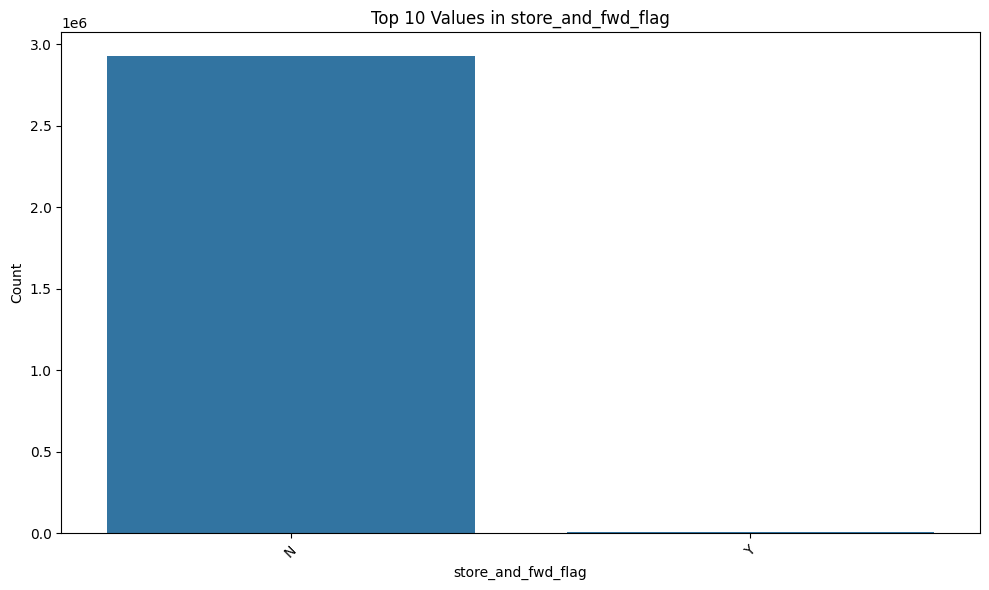

In [22]:
# 3. Categorical Fields Analysis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("Categorical Fields Analysis:")
    print("-" * 50)

    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        value_counts = df[col].value_counts()
        print(value_counts.head())

        # Create bar plot for top 10 categories
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.head(10).index, y=value_counts.head(10).values)
        plt.title(f"Top 10 Values in {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found in the dataset")

Temporal Analysis:
--------------------------------------------------

Timestamp range for tpep_pickup_datetime:
Start: 2024-12-31 20:47:55
End: 2025-02-01 00:00:44


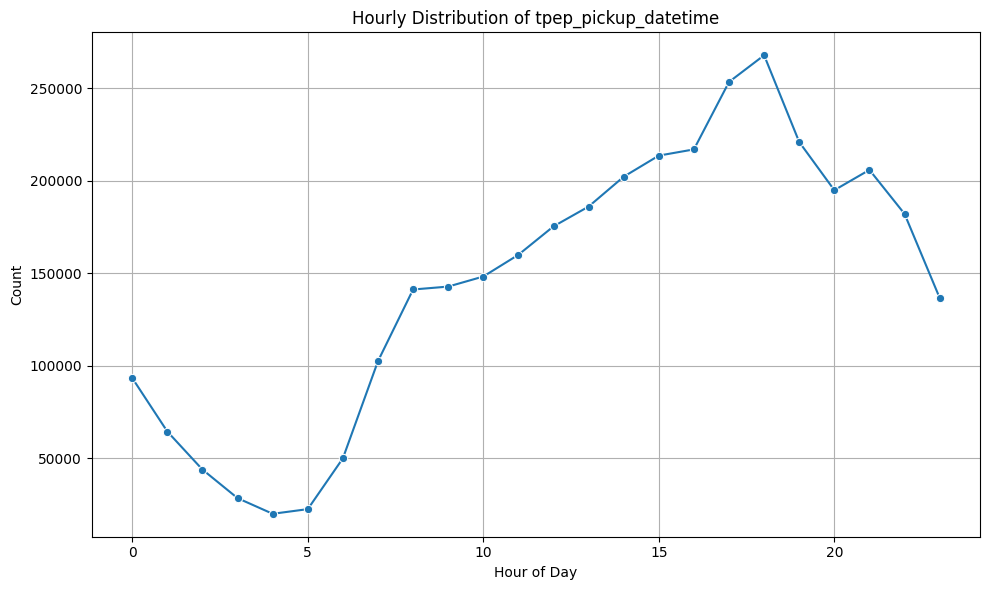

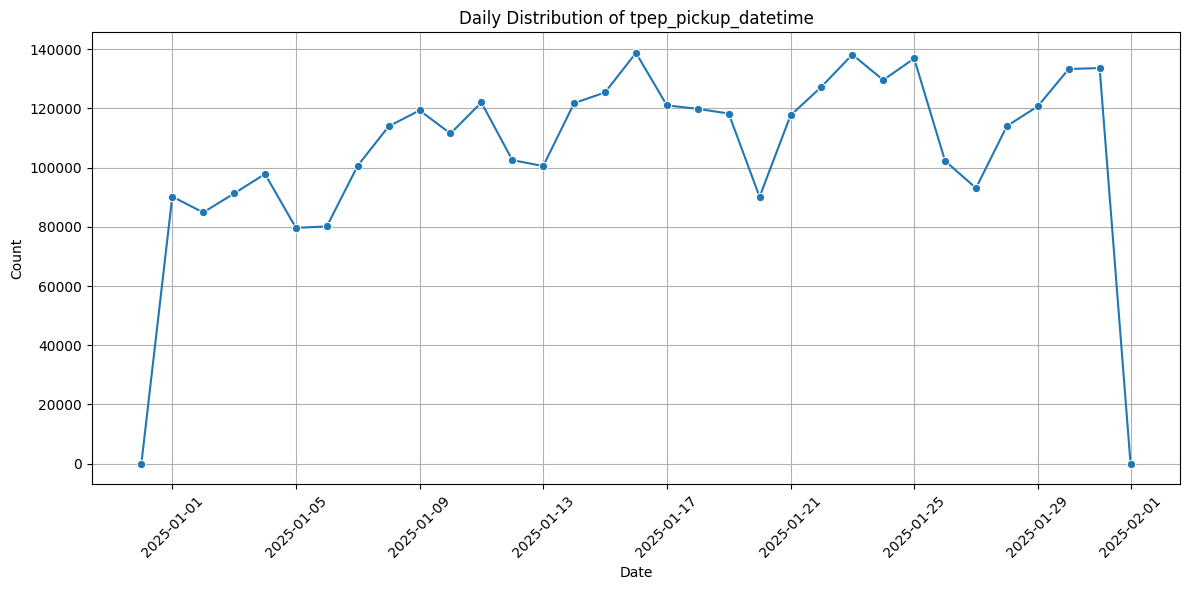


Timestamp range for tpep_dropoff_datetime:
Start: 2024-12-18 07:52:40
End: 2025-02-01 23:44:11


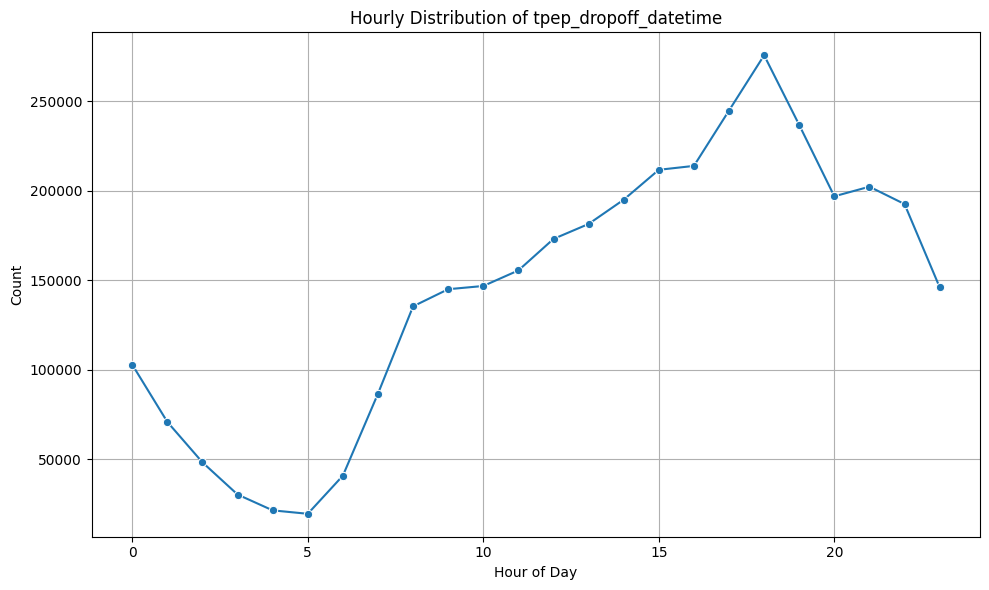

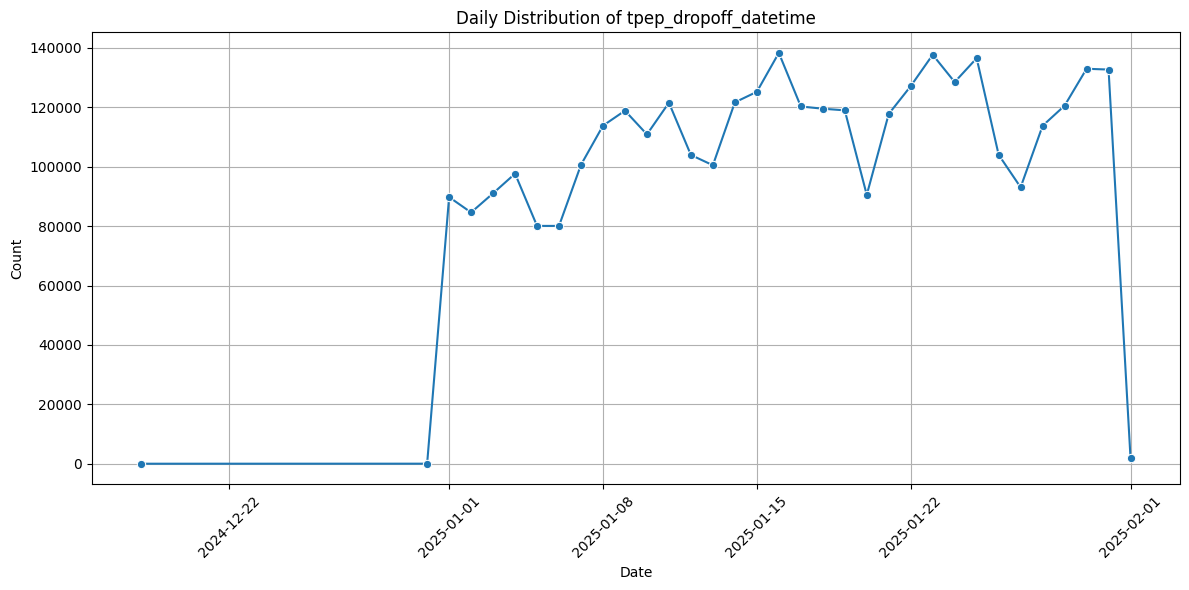

In [23]:
# 4. Temporal Analysis

datetime_cols = df.select_dtypes(include=['datetime64']).columns
if len(datetime_cols) > 0:
    print("Temporal Analysis:")
    print("-" * 50)
    
    for col in datetime_cols:
        print(f"\nTimestamp range for {col}:")
        print(f"Start: {df[col].min()}")
        print(f"End: {df[col].max()}")
        
        # Hourly distribution
        df[f'{col}_hour'] = df[col].dt.hour
        hourly_counts = df[f'{col}_hour'].value_counts().sort_index()
        
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
        plt.title(f"Hourly Distribution of {col}")
        plt.xlabel("Hour of Day")
        plt.ylabel("Count")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Daily distribution
        df[f'{col}_day'] = df[col].dt.date
        daily_counts = df[f'{col}_day'].value_counts().sort_index()
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker="o")
        plt.title(f"Daily Distribution of {col}")
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("No datetime columns found in the dataset")

Correlation Analysis:
--------------------------------------------------


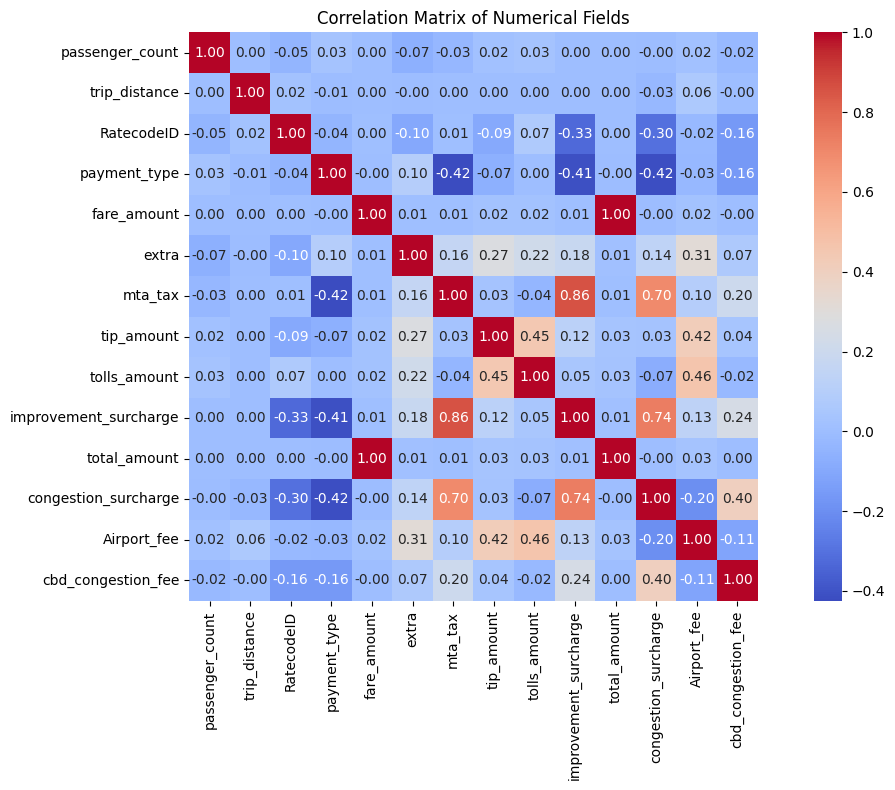


Strong correlations (|correlation| > 0.5):
fare_amount vs total_amount: 1.000
improvement_surcharge vs mta_tax: 0.857
congestion_surcharge vs mta_tax: 0.698
congestion_surcharge vs improvement_surcharge: 0.736


In [24]:
# 5. Correlation Analysis for Numerical Fields
import seaborn as sns
import matplotlib.pyplot as plt

if len(numerical_cols) > 1:
    print("Correlation Analysis:")
    print("-" * 50)
    
    # Calculate correlations
    corr_matrix = df[numerical_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title("Correlation Matrix of Numerical Fields")
    plt.tight_layout()
    plt.show()
    
    # Print strong correlations (|correlation| > 0.5):
    print("\nStrong correlations (|correlation| > 0.5):")
    for col1 in numerical_cols:
        for col2 in numerical_cols:
            if col1 < col2:  # Avoid duplicate pairs
                corr = corr_matrix.loc[col1, col2]
                # Only consider real numbers (skip NaN, Timedelta, etc.)
                if isinstance(corr, (float, int)) and not pd.isnull(corr):
                    if abs(corr) > 0.5:
                        print(f"{col1} vs {col2}: {corr:.3f}")
else:
    print("Not enough numerical columns for correlation analysis")

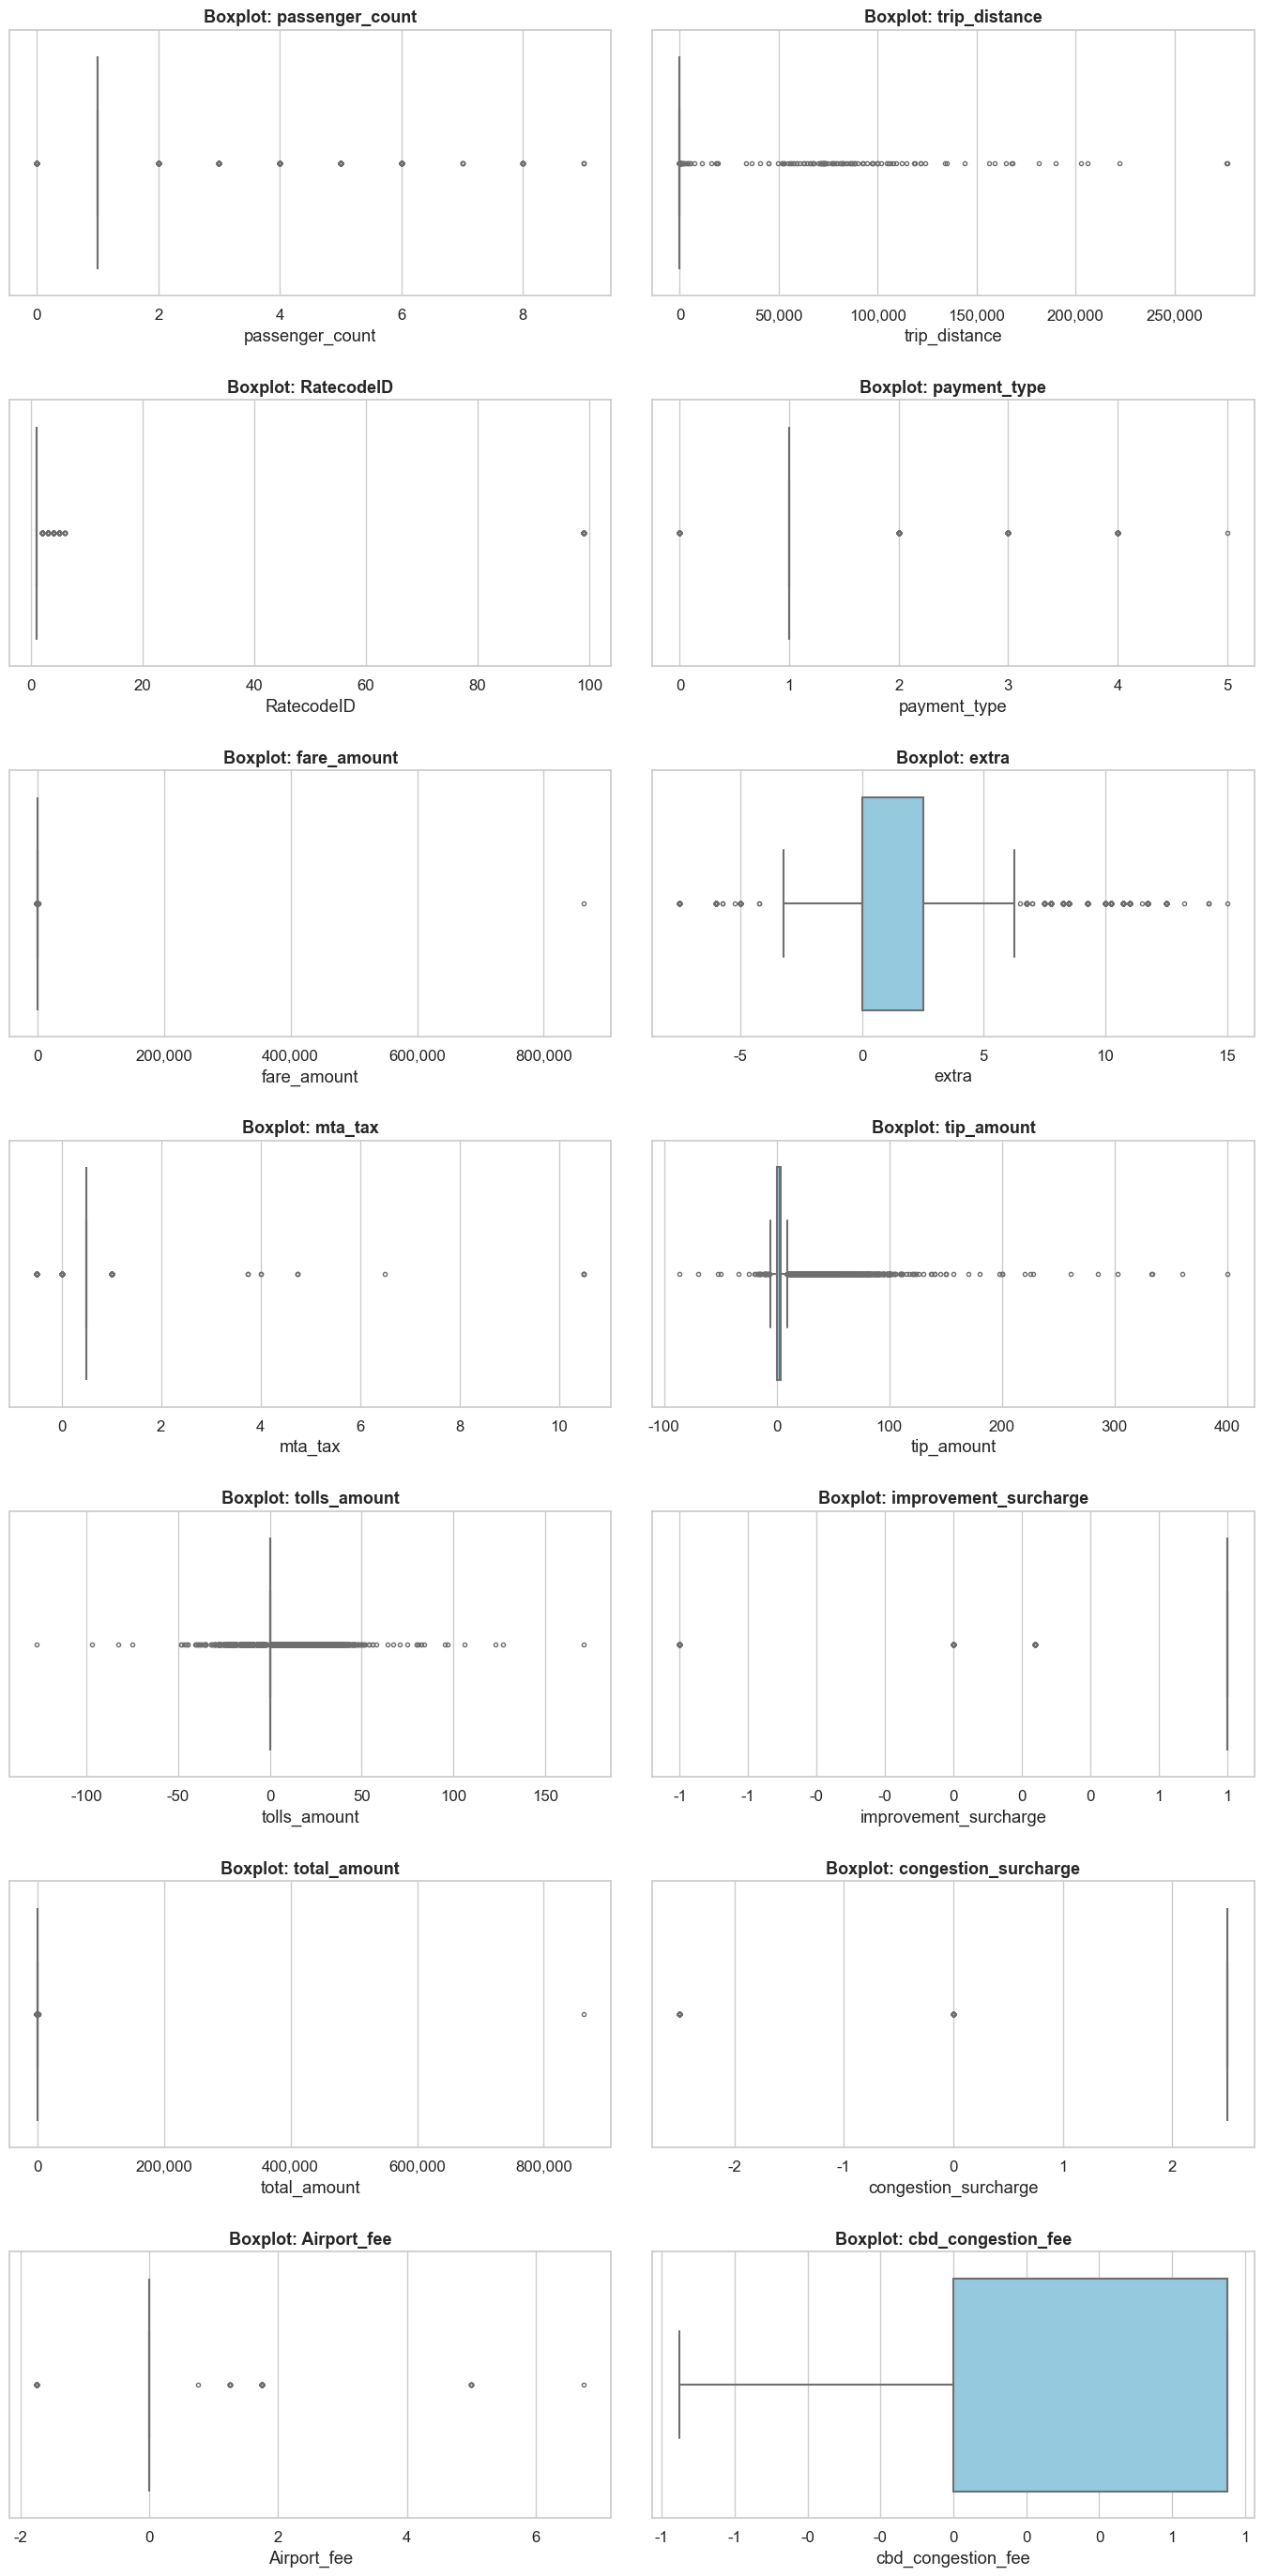

In [25]:
# Outlier Detection (Boxplots for all numerical columns)
import matplotlib.ticker as mticker
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

num_cols = list(numerical_cols)
if num_cols:
    n = len(num_cols)
    fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(14, 4*((n+1)//2)))
    axes = axes.flatten()
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i], color="skyblue", fliersize=3, linewidth=1.5)
        axes[i].set_title(f"Boxplot: {col}", fontsize=13, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(pad=2)
    plt.show()
else:
    print("No numerical columns for outlier detection.")

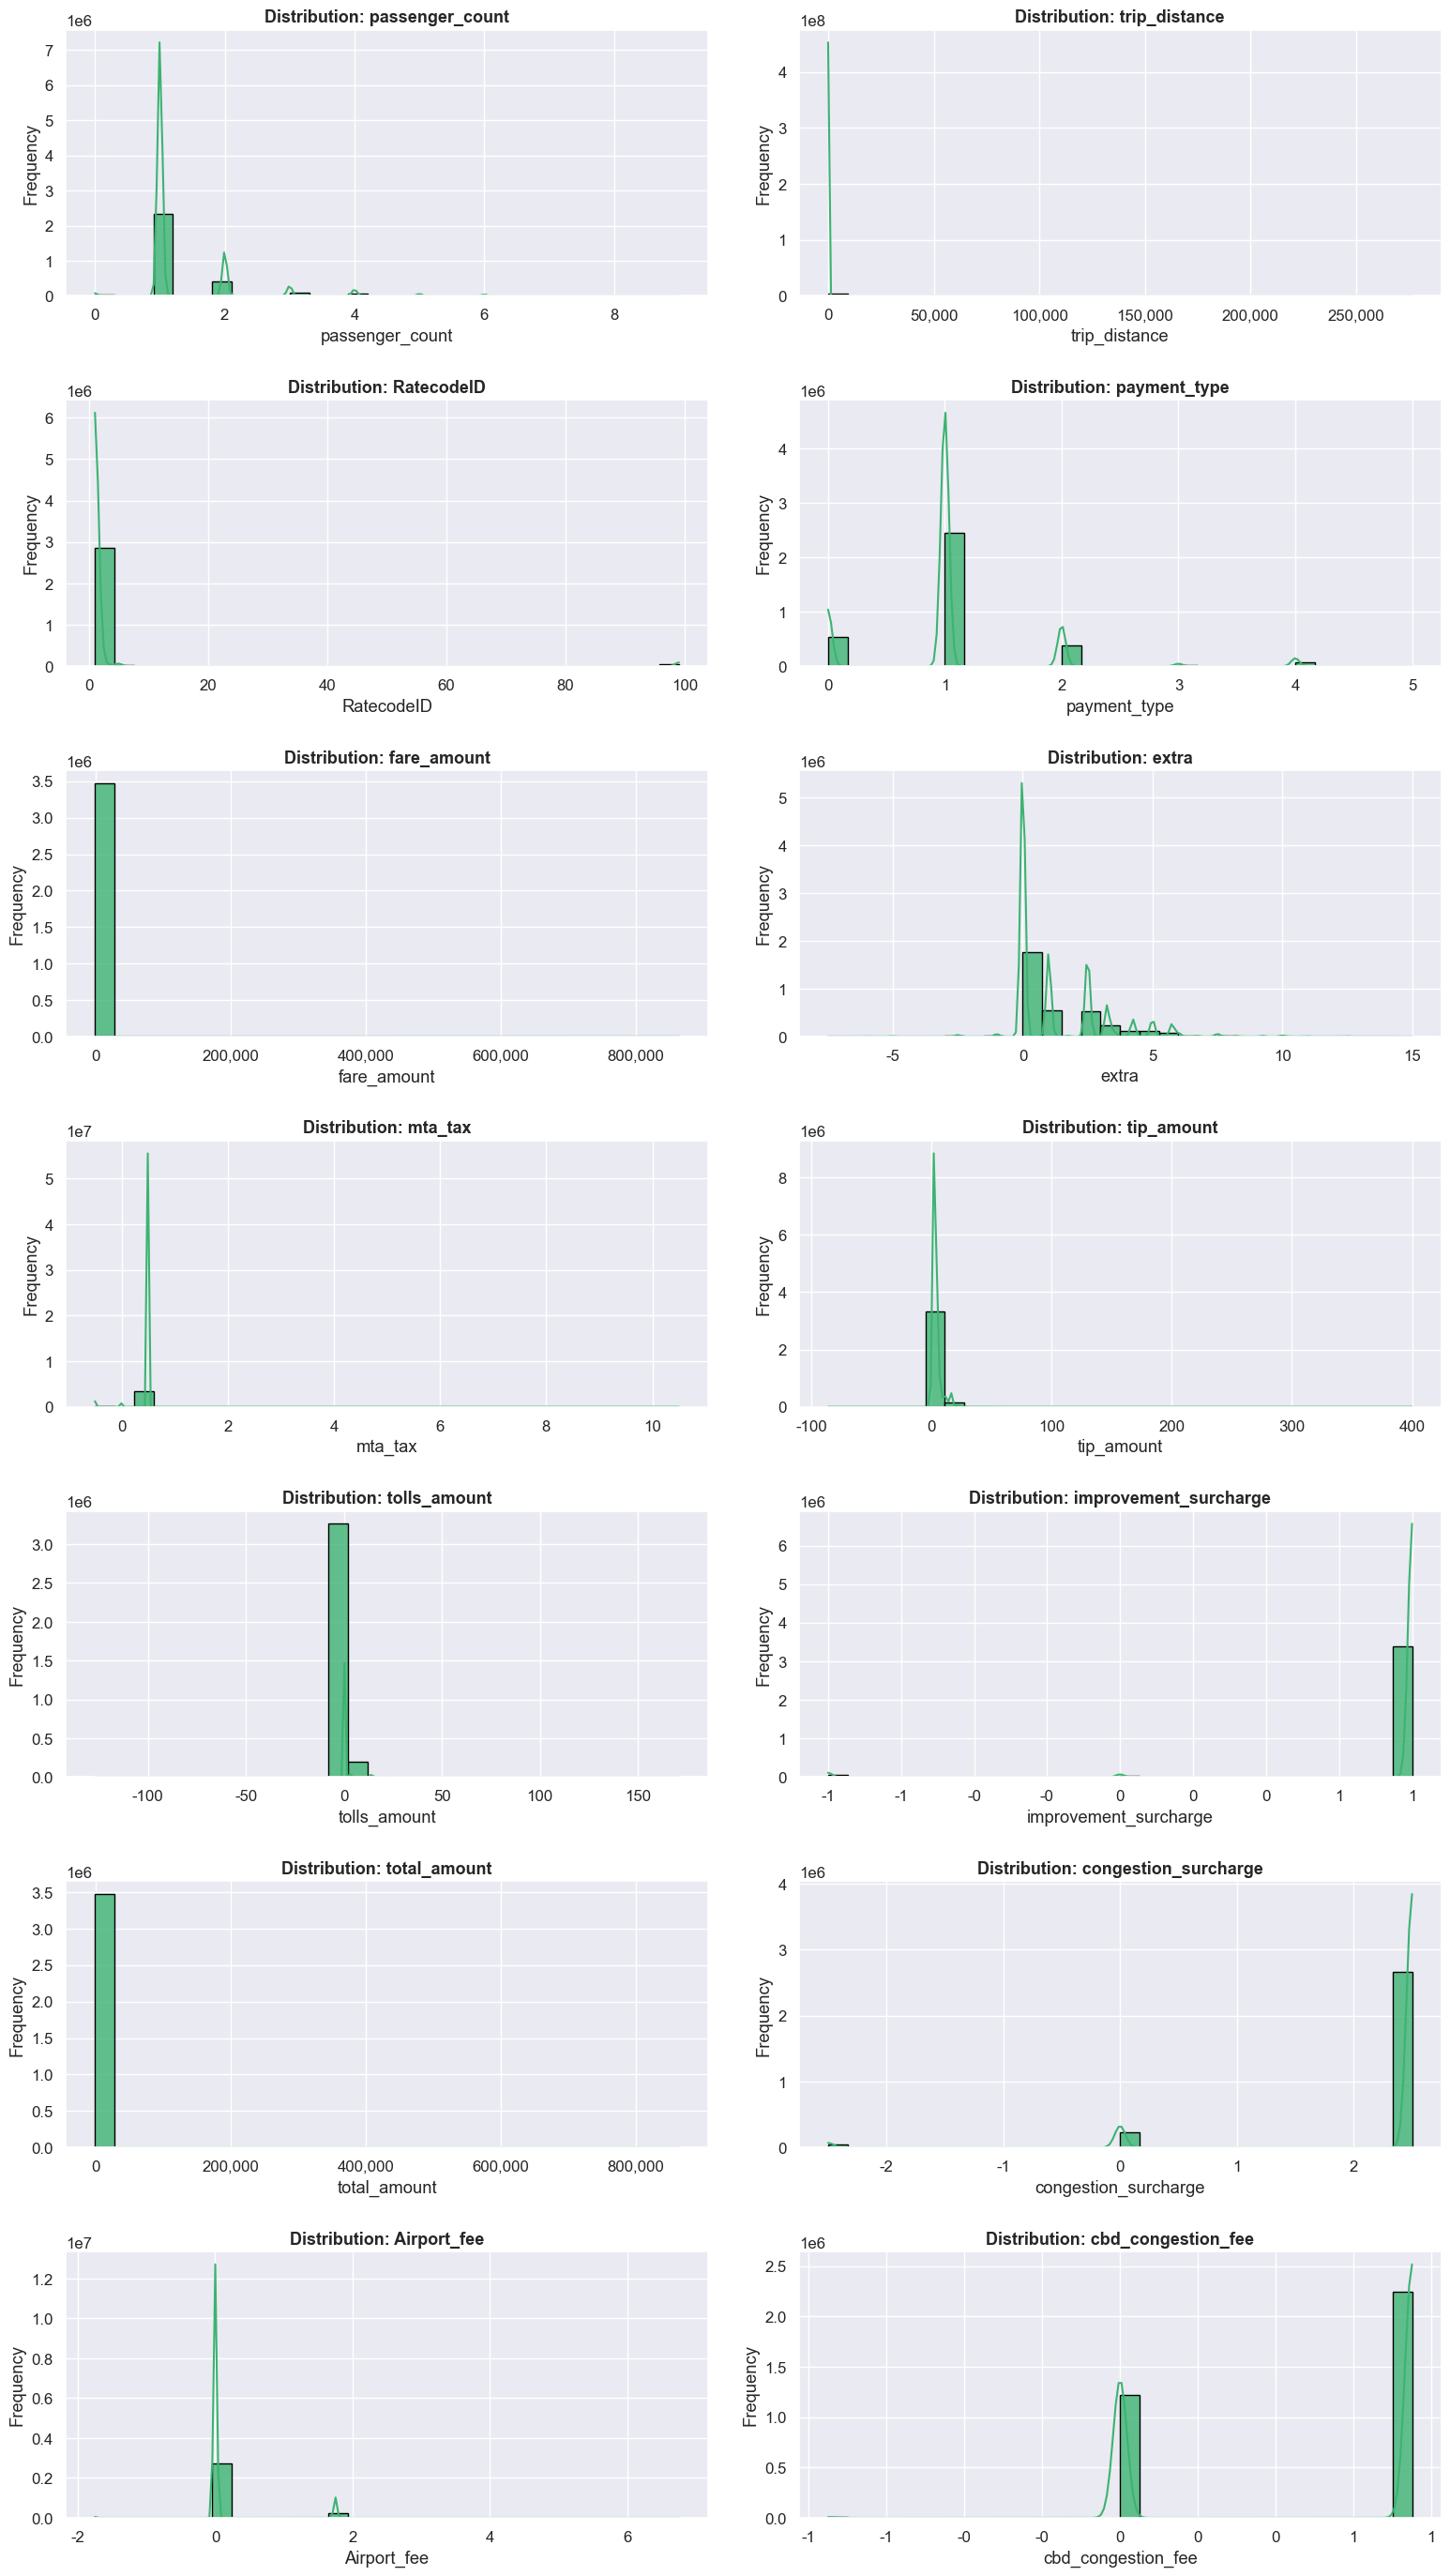

In [26]:
# Feature Distributions (Histograms/KDE for all numerical columns)
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

if num_cols:
    n = len(num_cols)
    fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(16, 4*((n+1)//2)))
    axes = axes.flatten()
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color="mediumseagreen", edgecolor="black", alpha=0.8)
        axes[i].set_title(f"Distribution: {col}", fontsize=13, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(pad=2)
    plt.show()
else:
    print("No numerical columns for feature distribution analysis.")

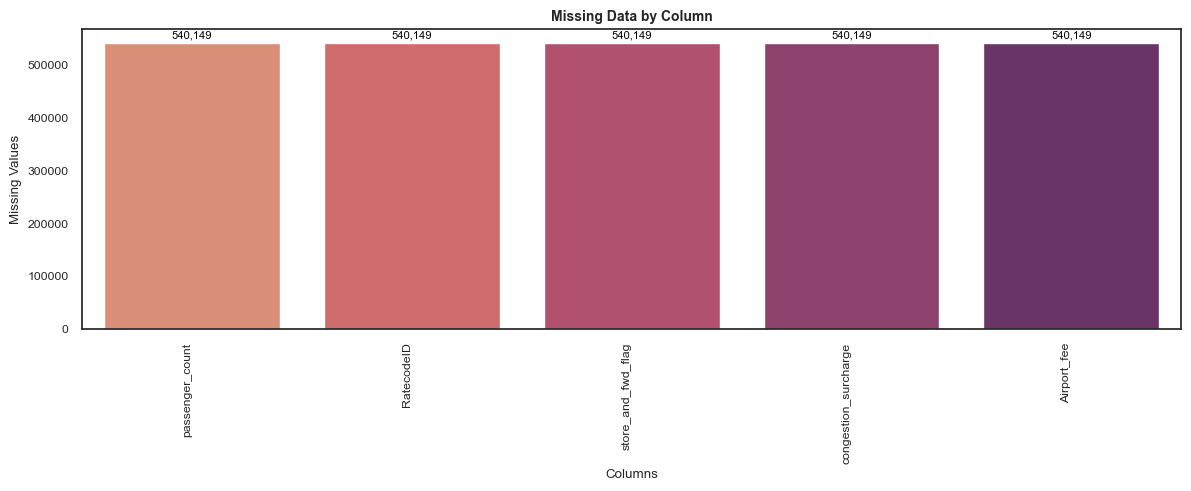

In [31]:
# Missing Data Analysis (Barplot for missing values)
sns.set(style="white", font_scale=0.8)

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if not missing_data.empty:
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette="flare", hue=missing_data.index)
    plt.title("Missing Data by Column", fontsize=10, fontweight='bold')
    plt.xlabel("Columns")
    plt.ylabel("Missing Values")
    plt.xticks(rotation=90, ha='right')
    for i, v in enumerate(missing_data.values):
        ax.text(i, v + max(missing_data.values)*0.01, f"{int(v):,}", ha='center', va='bottom', fontsize=8, color='black')
    plt.tight_layout()
    plt.show()
else:
    print("No missing data found in the dataset.")